# Ejercicio Pandas IV: Informe macroeconómico de Argentina

La consultora "Nuevos Horizontes" quiere hacer un análisis del mercado argentino para entender como ha evolucionado en los últimos años. Van a analizar dos indicadores macroeconómicos principales: el **IPC: Índice de Precios al Consumidor** (para medir inflación) y el tipo de cambio (**cotización del dólar**).

## IPC: Índice de Precios al Consumidor

Para más información sobre el IPC pueden visitar la siguiente página del INDEC: https://www.indec.gob.ar/indec/web/Nivel4-Tema-3-5-31

La base de IPC a analizar tiene como base diciembre de 2016, al cual le corresponde el índice 100. Los precios se encuentran con cuatro niveles de apertura: 

* General: Indice de Precios de toda la canasta de bienes y servicios considerada en el análisis

* Estacional: Bienes y servicios con comportamiento estacional. Por ejemplo: frutas y verduras

* Regulados: Bienes y servicios cuyos precios están sujetos a regulación o tienen alto componente impositivo. Por ejemplo: electricidad

* Núcleo: : Resto de los grupos del IPC

Su jefa quiere analizar el comportamiento de los cuatro niveles de apertura del indice de precios en los años que componen el dataset. Para eso le pide que obtenga el promedio, mediana e índice máximo anuales para cada nivel de apertura. Luego, de ser posible, graficar la evolución anual del índice medio a nivel general.

**Pasos sugeridos:**

    1) Leer los datos del IPC.

    2) Modificar la tabla para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

    3) Convertir la variable de fecha al formato date-time y extraer el año y el mes.

    *Ayuda*: Vas a tener que utilizar el argumento format en la función to_datetime de pandas. En esta página vas a poder encontrar los códigos de formato o directivas necesarios para convertir las fechas: https://docs.python.org/es/3/library/datetime.html#strftime-and-strptime-behavior

    4) Calcular el indice promedio, mediano y maximo por año para cada nivel de apertura.

    5) Graficar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1) Leer los datos del IPC.**

In [ ]:
ipc_df = pd.read_csv('./Data/ipc_indec.csv')

In [3]:
print(ipc_df.head())

        Apertura  Dec-16  Jan-17  Feb-17  Mar-17  Apr-17  May-17  Jun-17  \
0  Nivel general   100.0   101.6   103.7   106.1   109.0   110.5   111.8   
1     Estacional   100.0   101.7   102.3   104.8   108.2   109.1   110.1   
2         Núcleo   100.0   101.5   103.2   105.2   107.4   109.2   110.7   
3      Regulados   100.0   101.8   105.9   110.0   114.5   115.7   116.7   

   Jul-17  Aug-17  ...  Sep-19  Oct-19  Nov-19  Dec-19  Jan-20  Feb-20  \
0   113.8   115.4  ...   253.7   262.1   273.2   283.4   289.8   295.7   
1   110.6   111.8  ...   217.0   223.2   239.6   244.7   253.6   260.0   
2   112.6   114.2  ...   250.5   260.0   270.4   280.3   287.2   294.0   
3   119.4   121.1  ...   284.7   290.5   301.6   315.5   319.1   321.3   

   Mar-20  Apr-20  May-20  Jun-20  
0   305.6   310.1   314.9   322.0  
1   272.7   285.9   299.3   313.6  
2   303.2   308.4   313.3   320.6  
3   331.9   329.7   329.4   331.8  

[4 rows x 44 columns]


**2) Modificar la tabla** para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

In [4]:
ipc_df_long = ipc_df.melt(id_vars=['Apertura'], var_name='Fecha', value_name='Indice')

In [5]:
print(ipc_df_long.head())

        Apertura   Fecha  Indice
0  Nivel general  Dec-16   100.0
1     Estacional  Dec-16   100.0
2         Núcleo  Dec-16   100.0
3      Regulados  Dec-16   100.0
4  Nivel general  Jan-17   101.6


**3)** Convertir la **variable de fecha** al formato date-time y extraer el año y el mes


In [6]:
ipc_df_long['Fecha'] = pd.to_datetime(ipc_df_long['Fecha'], format='%b-%y') 

In [7]:
ipc_df_long['Año'] = ipc_df_long['Fecha'].dt.year
ipc_df_long['Mes'] = ipc_df_long['Fecha'].dt.month

In [8]:
print(ipc_df_long.head())

        Apertura      Fecha  Indice   Año  Mes
0  Nivel general 2016-12-01   100.0  2016   12
1     Estacional 2016-12-01   100.0  2016   12
2         Núcleo 2016-12-01   100.0  2016   12
3      Regulados 2016-12-01   100.0  2016   12
4  Nivel general 2017-01-01   101.6  2017    1


**4)** Calcular el **indice promedio, mediano y maximo** por año para cada nivel de apertura.

In [9]:
estadisticas = ipc_df_long.groupby(['Año', 'Apertura']).agg(
    promedio=('Indice', 'mean'),
    mediana=('Indice', 'median'),
    maximo=('Indice', 'max')
).reset_index()

In [10]:
print(estadisticas.head())

    Año       Apertura    promedio  mediana  maximo
0  2016     Estacional  100.000000   100.00   100.0
1  2016  Nivel general  100.000000   100.00   100.0
2  2016         Núcleo  100.000000   100.00   100.0
3  2016      Regulados  100.000000   100.00   100.0
4  2017     Estacional  111.366667   110.35   121.5


**5) Graficar**

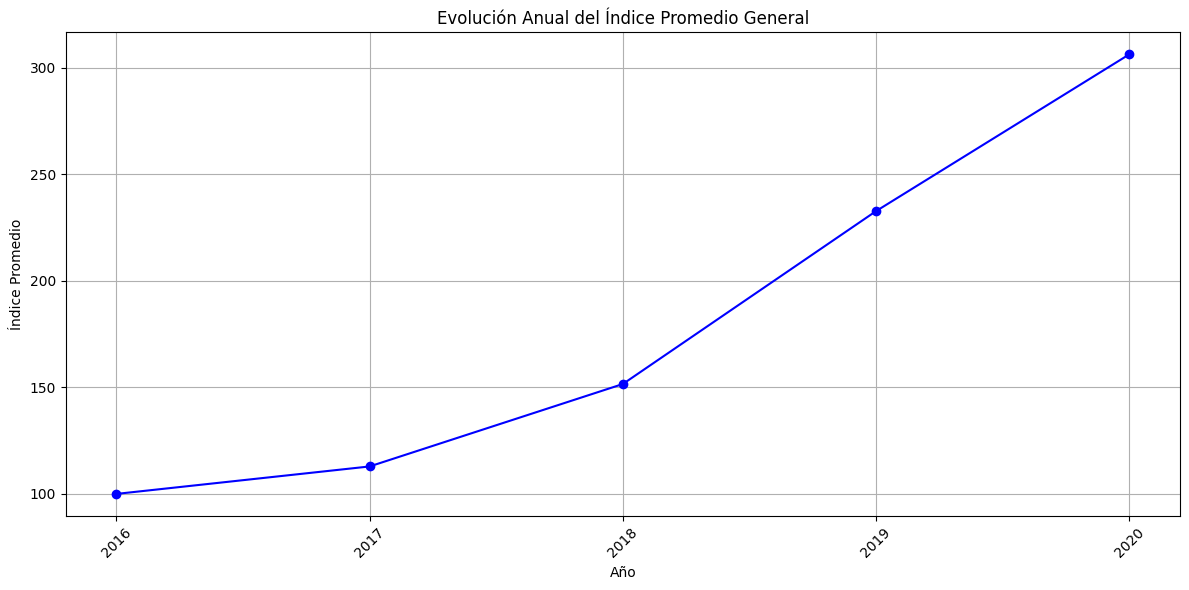

In [11]:
ipc_general = estadisticas[estadisticas['Apertura'] == 'Nivel general']

plt.figure(figsize=(12, 6))
plt.plot(ipc_general['Año'], ipc_general['promedio'], marker='o', linestyle='-', color='b')
plt.title('Evolución Anual del Índice Promedio General')
plt.xlabel('Año')
plt.ylabel('Índice Promedio')
plt.grid(True)
plt.xticks(ipc_general['Año'], rotation=45)
plt.tight_layout()
plt.show()